# Data Exploration Seasonality

Alex Peed, Kunal Shah, Willie Jin, Sam Lam

In [13]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import seaborn as sb
import numpy as np
import datetime as dt
from datetime import datetime
%matplotlib inline

## Overall Goal:

The goal of the seasonality analysis is to flush out the model that we used for predicting AirBnB pricing. Prices obviously change over time, so this added level of specificity makes the model that much more usable. Obviously, this is a problem that AirBnB has been actively trying to incorporate into their pricing analysis. While we did seem a high level of predictive power for our model, to be able to generalize it to an entire year instead of one snapshot at a specific date is obviously very important. Also, we are hoping with the seasonal nature of the data, utilizing such analysis will help decrease the residuals of our predictors by allowing for more detailed predictions based on more factors. 

In [2]:
#Importing Datafile and converting to numbers
data = pd.read_csv('../datasets/calendar_clean.csv')
data['new price']=data['new price'].str.lstrip('$').astype(float)

This is what the dataset looks like right now. We needed to make changes to turn price into a float, date into a Python Datetime object, and create a column telling us what day of the week each date represents.

In [18]:
data.head(5)

,listing_id,date,available,new price
0,3604481.0,1/1/2015,t,600.0
1,3604481.0,1/2/2015,t,600.0
2,3604481.0,1/3/2015,t,600.0
3,3604481.0,1/4/2015,t,600.0
4,3604481.0,1/5/2015,t,600.0


In [3]:
data['date']=pd.to_datetime(data['date'])

In [4]:
data['weekday'] = pd.Series(data.date).dt.dayofweek

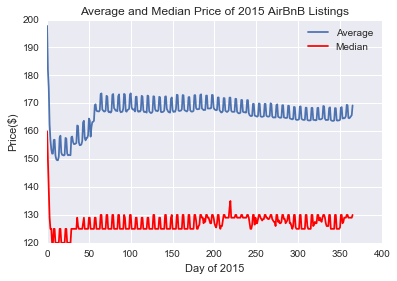

In [5]:
#Taking average/median values as well as plotting
date=[]
avg_price=[]
median_price=[]
for i in data['date'].unique():
    date.append(i)
    avg_price.append(data[data['date'] == i]['new price'].mean())
    median_price.append(data[data['date'] == i]['new price'].median())
plt.plot(range(len(avg_price)), avg_price, label= "Average")
plt.plot(range(len(avg_price)),median_price,color='red', label = "Median")
plt.ylabel('Price($)')
plt.xlabel('Day of 2015')
plt.title('Average and Median Price of 2015 AirBnB Listings')
plt.legend()

Here we see very interesting trends that occur. Overall, it seems like the trends are very cyclical in nature-- most clearly from a weekly perspective. We then look at a trend of the first 4 weeks of 2015 to get a better idea of whether the cycles are indeed weekly. Secondly, it is worth noting that besides the first day or two where the price is extremely high(perhaps this has to do with New Years), the only only time we see a notable trend in prices, other than the obvious cyclicality, is a depression in the general prices in the first two months or so. Thus in order of priority, we analyze seasonality based on the day of the weeks, important holidays, and then months.

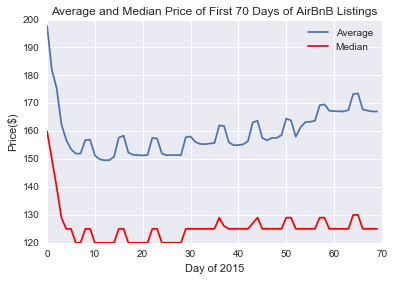

In [8]:
plt.plot(range(len(avg_price[0:70])), avg_price[0:70], label= "Average")
plt.plot(range(len(avg_price[0:70])),median_price[0:70],color='red', label = "Median")
plt.ylabel('Price($)')
plt.xlabel('Day of 2015')
plt.title('Average and Median Price of First 70 Days of AirBnB Listings')
plt.legend()

Here, we can clearly see the weekly cyclicality trends of the data. Clearly there are peaks around once every 7 days: 7, 14, 21, etc. Thus, we will look at days of the week first.

In [17]:
daily_avg_price=[]
daily_median_price=[]
b=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
for i in range(7):
    daily_avg_price.append(data[data['weekday'] == i]['new price'].mean())
    daily_median_price.append(data[data['weekday'] == i]['new price'].median())

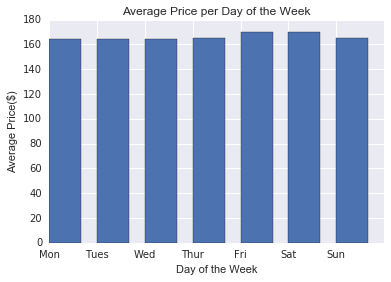

In [80]:
plt.bar(range(len(daily_avg_price)),daily_avg_price,1/1.5)
plt.xticks(range(len(daily_avg_price)),b)
plt.ylabel('Average Price($)')
plt.xlabel('Day of the Week')
plt.title('Average Price per Day of the Week')

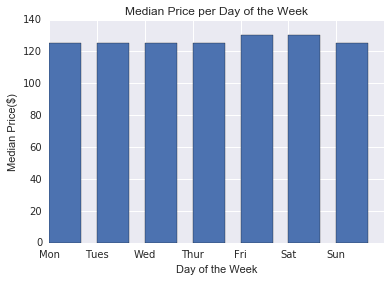

In [81]:
plt.bar(range(len(daily_avg_price)),daily_median_price,1/1.5)
plt.xticks(range(len(daily_avg_price)),b)
plt.ylabel('Median Price($)')
plt.xlabel('Day of the Week')
plt.title('Median Price per Day of the Week')

In [18]:
multiplier = []
for i in range(7):
    multiplier.append(daily_avg_price[i]/daily_avg_price[0])

In [19]:
multiplier

[1.0,
 0.999677044441654,
 0.999581906843472,
 1.001452750623622,
 1.0314801624309469,
 1.031393687509484,
 1.0023139513392798]

In [40]:
pricing_data=dict.fromkeys(b)

In [41]:
for i in pricing_data:
    pricing_data[i]=[]

In [42]:
## Alternate version where 
listing_id=[]
for i in data['listing_id'].unique():
    listing_id.append(i)
    for index,j in enumerate(b):
        pricing_data[j].append(data[(data['weekday'] == index) & (data['listing_id'] == i)]['new price'].mean())
        

In [44]:
results = pd.DataFrame(pricing_data)
results['listing_id'] = listing_id
results_nona = results.dropna(axis = 0)
results_nona = results_nona[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'listing_id']]

In [45]:
results_nona

,Mon,Tue,Wed,Thu,Fri,Sat,Sun,listing_id
0,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,3604481.0
1,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,2949128.0
2,70.576923,70.000000,70.000000,70.566038,80.384615,80.384615,70.576923,4325397.0
3,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,4325398.0
4,110.697674,109.756098,110.138889,111.184211,112.361111,111.944444,110.581395,3426149.0
5,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,65562.0
6,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,2730672.0
7,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,4587554.0
8,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,819206.0
10,260.931818,256.521739,258.711111,268.045455,280.333333,283.133333,260.409091,2359340.0


Something we notice from the Seasonality data is that much of the average prices by listing actually dont fluctuate over time. This explains a lot of why the original changes we from the average prices(across all listings) by day overall is pretty similar-- with a max of around 3% higher on Fridays and Saturdays compared to monday. Looking at this table also allows us to see a lot of business appeal! The fact that so many listings are not fluctuating their prices based on the day of the week shows some pricing inconsistencies with we have established is a necessary phenomena-- dynamic pricing. The fact that so many of these Day of the Week averages for each listing are exactly the same suggests that these listings do not change their prices for any of the reason. Clearly, these listings could use the results of our analysis to incorporate dynamic pricing in their prices over time to help optimize their profits.

In [37]:
for i in b[1:7]:
    results_nona[i] = results_nona[i]/results_nona['Mon']
results_nona['Mon']= 1

NameError: name 'results_nona' is not defined

In [160]:
results_nona['Sun'].mean()

1.0009269127770262

## Using ARIMA time series models for future forecasting